# Árboles de decisión

Se le llama árbol de decisión al conjunto de reglas que se utilizan para tomar decisiones basadas en características de los datos de entrada.

Se dividen los datos en función de un atributo que mejor separe las diferentes clases o categorías. Esta división se realiza en cada nodo del árbol, creando nuevas ramas. Cada nodo del árbol representa una pregunta o prueba sobre un atributo, y las ramas representan las diferentes respuestas o posibles valores de ese atributo. Conforme se avanza, se aplican mas pruebas a los atributos hasta llegar a una hoja, que representa una decisión o una categoría final.

Se aplica para **clasificar variables categóricas o predecir valores numéricos**. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

---

### Clasificación

In [2]:
from sklearn.datasets import load_diabetes
from sklearn import preprocessing

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['sex']])
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [3]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

Score:  0.6390977443609023


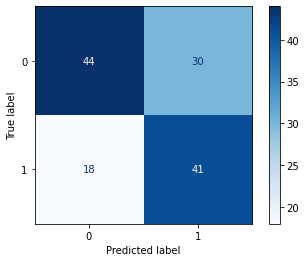

In [4]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

In [5]:
#tree.plot_tree(arbol);

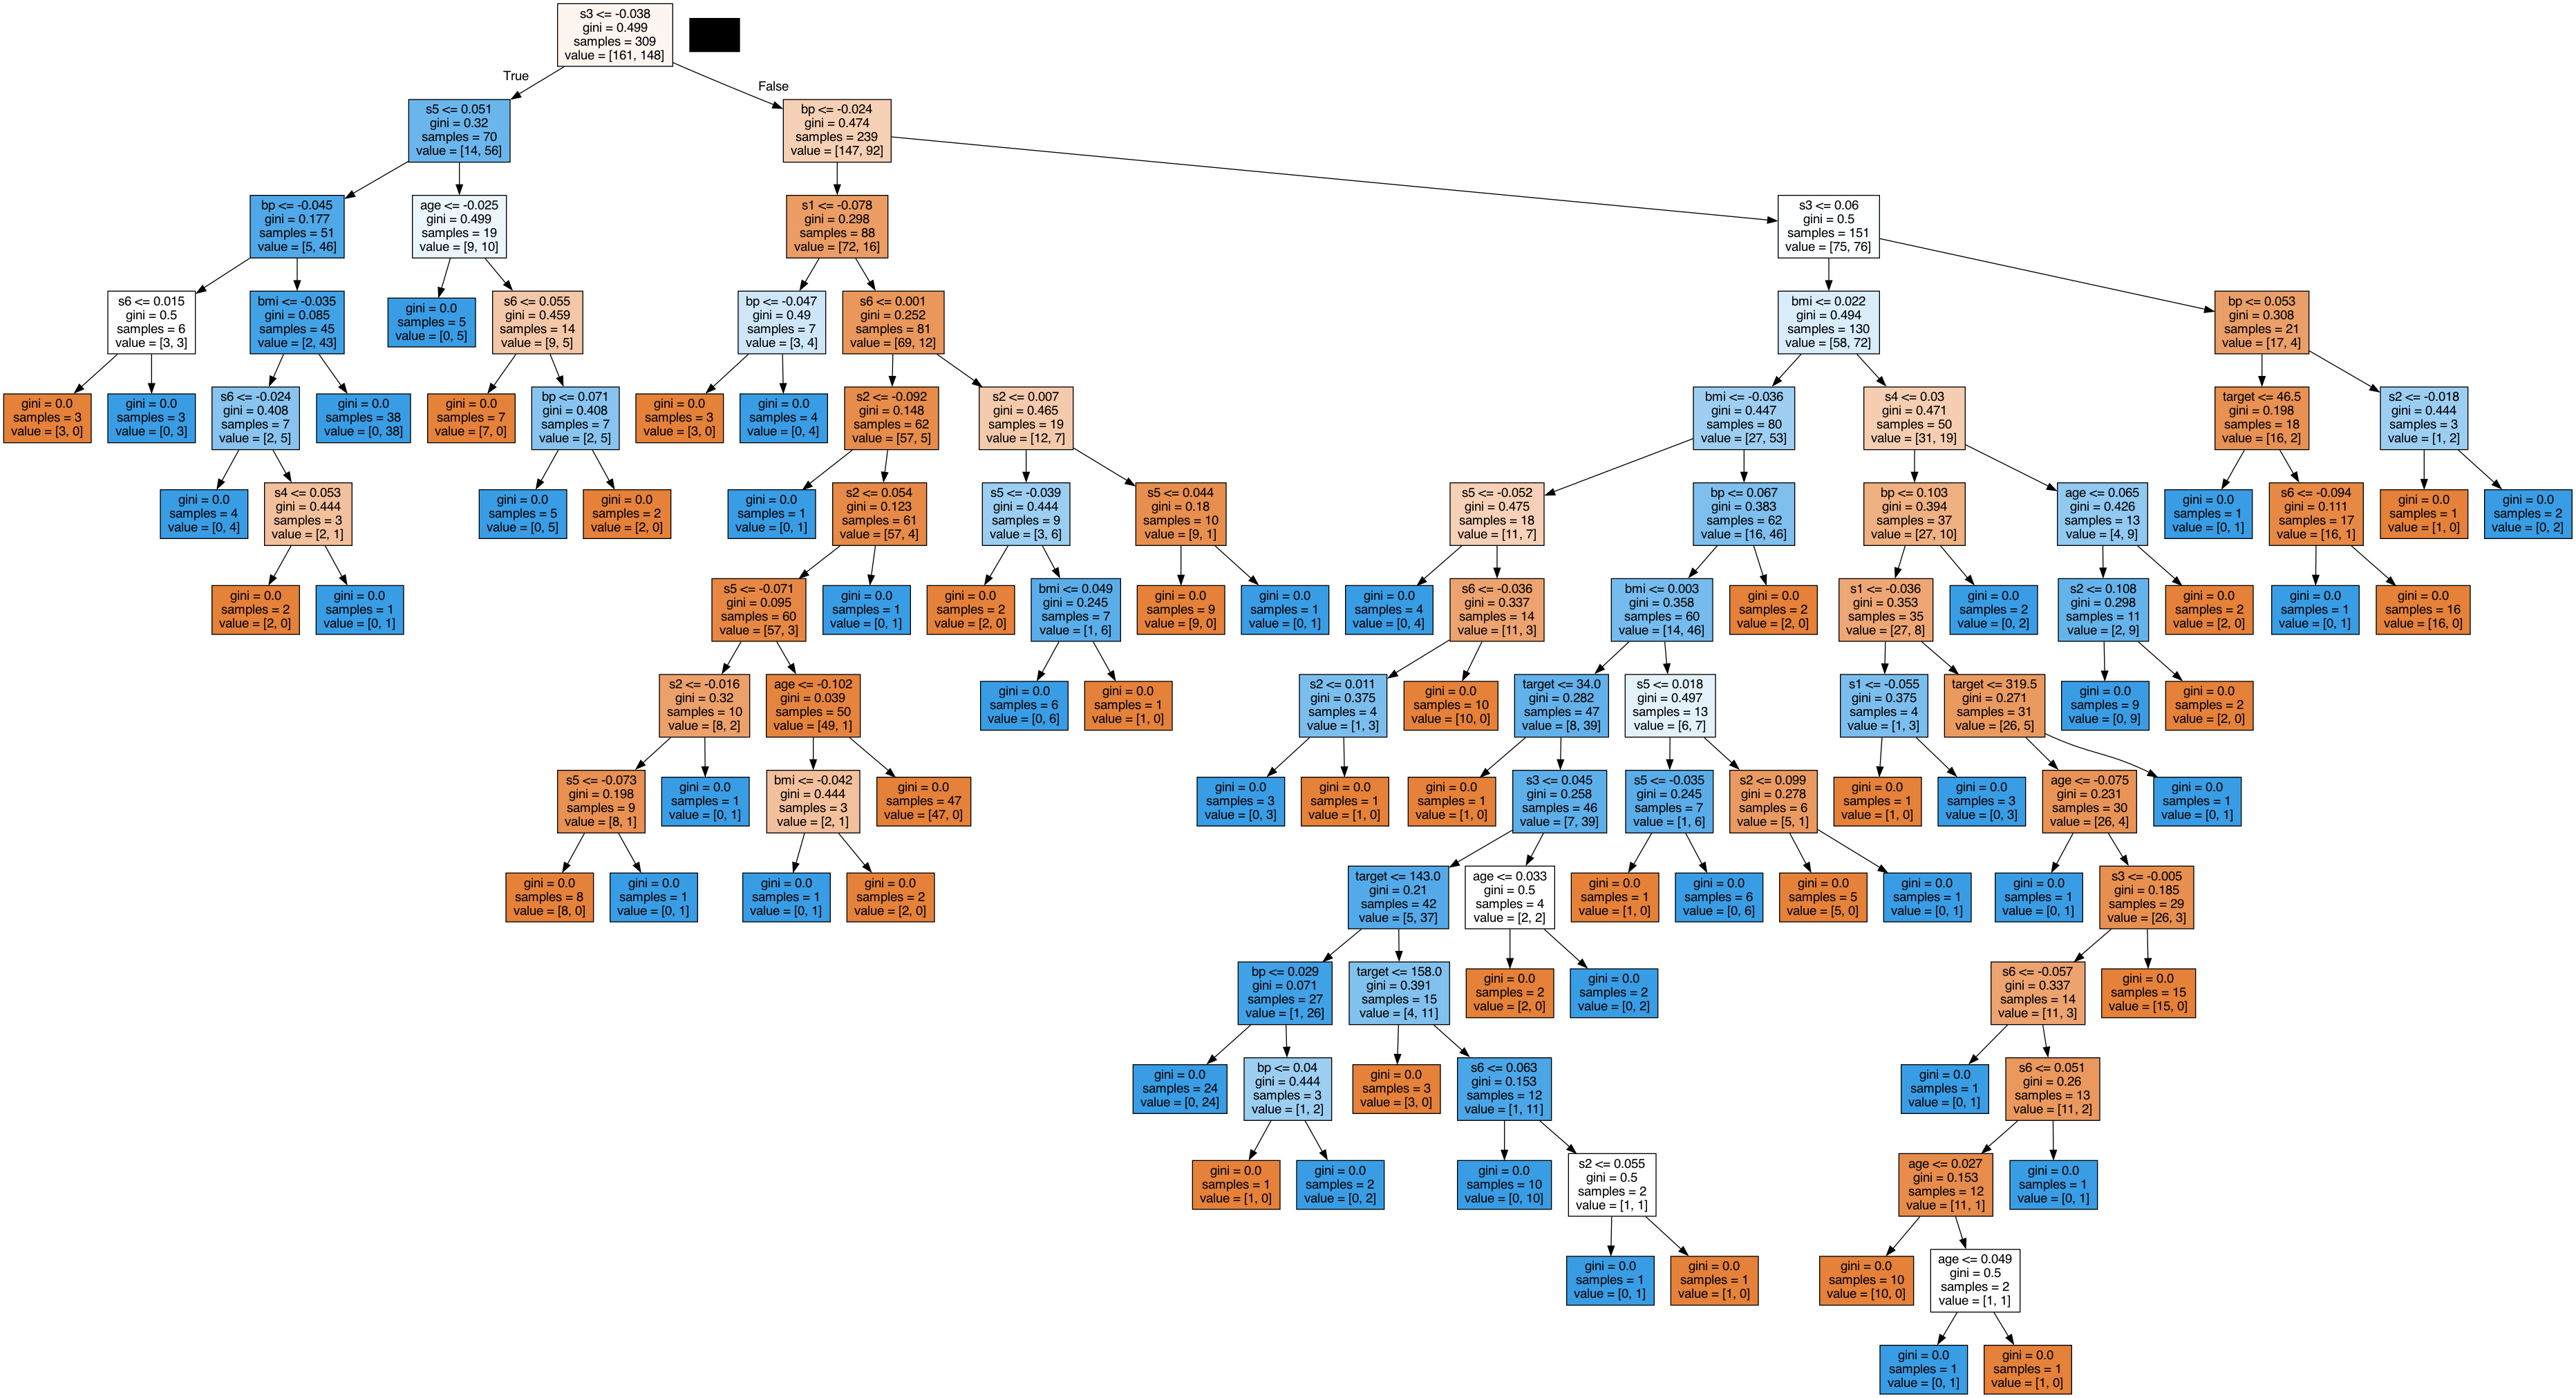

In [6]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random forest

Para evitar sesgos, se crean múltiples árboles independientes utilizando diferentes subconjuntos de datos de entrenamiento y características aleatorias. Un Random Forest es un conjunto (ensemble) de múltiples árboles de decisión donde cada árbol proporciona una predicción independiente. Posteriormente se realiza un promedio de las predicciones independientes. 

In [7]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['sex']])
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )


In [8]:
# n_estimators = numero de arboles independientes (100 default)
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Score:  0.6766917293233082


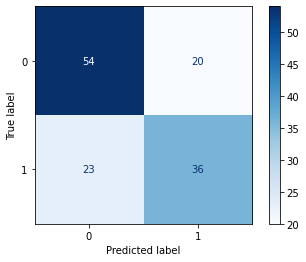

In [9]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

---
### Predicción de valores numéricos

In [10]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10)

forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

In [12]:
print('Score: ', forest_reg.score(X_test, y_test))

Score:  0.2149254136860963


In [13]:
#dummies = pd.get_dummies(df.sex, prefix='sex')
#dummies.head(3)

#X = pd.concat([df, dummies], axis=1).drop(columns=["sex"])


---
---

## Ejercicio:

Usar el dataset precargado de sklearn de cáncer de mama (load_breast_cancer) y construir un modelo que prediga si hay cancer o no utilizando árboles de decisión.  

In [14]:
from sklearn.datasets import load_breast_cancer

cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
df['target'] = cancer_mama.target

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
